In [2]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib
#matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg

import settings

LARGE_FONT = ("Verdana", 12)

In [32]:
class LabelApp(tk.Tk):
    
    def __init__(self, *args, **kwargs):
        tk.Tk.__init__(self, *args, **kwargs)
        
        #tk.Tk.iconbitmap(self, default="clienticon.ico")
        tk.Tk.wm_title(self,  "Sea of BTC Client")

        container = tk.Frame(self)
        container.pack(side="top", fill="both", expand=True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}
        for F in (Config, Graph,):
            frame = F(container, self)
            self.frames[F] = frame
            frame.grid(row=0, column=0, sticky="nsew")

        self.show_frame(Graph)

    def show_frame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()


class Config(tk.Frame):
    
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = ttk.Label(self, text="Config", font=LARGE_FONT)
        label.pack(padx=50, pady=50)

        button = ttk.Button(self, text="Graph", 
                            command=lambda: controller.show_frame(Graph))
        button.pack()

        
class Graph(tk.Frame):
    
    def __init__(self, parent, controller):
        
        # Boilerplate
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Up arrow for 0 (good), down arrow for 1 (bad)", font=LARGE_FONT)
        label.pack(padx=10, pady=10)
        
        fig = Figure(figsize=(10,3), dpi=100)
        plot = fig.add_subplot(111)
        
        # Temp graph, replace with dataset
#         self.X = np.linspace(-np.pi, np.pi, 1000)
#         self.Y = 2 + np.sin(self.X) + np.hstack((0.1*np.random.randn(333), 0.2*np.random.randn(334), 0.1*np.random.randn(333)))
#         plot.scatter(self.X, self.Y, s=1)

        self.dataset = Dataset(settings.FILENAME, settings.CHUNK_SIZE, settings.STEP)
        
        data = self.dataset.next_chunk()
        self.X, self.Y = data[:,0], data[:,1]
        plot.scatter(self.X, self.Y, s=.01)
        
        # Boilerplate
        canvas = FigureCanvasTkAgg(fig, self)
        canvas.show()
        canvas.get_tk_widget().pack(side="bottom", fill="both", expand=True)
        
        toolbar = NavigationToolbar2TkAgg(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        # To fix: saving the last label
        def up(event=None):
            try:
                self.Y = self.dataset.next_chunk()[:,1]
            except:
                return
            print("ok")
            write('result.txt', 1)
            plot.clear()
            plot.scatter(self.X, self.Y, s=.01)
            canvas.show()
            
        def down(event=None):
            try:
                self.Y = self.dataset.next_chunk()[:,1]
            except:
                return
            print("bad")
            write('result.txt', 0)
            plot.clear()
            
            plot.scatter(self.X, self.Y, s=.01)
            canvas.show()
        
        controller.bind("<Up>", up)
        controller.bind("<Down>", down)

class Dataset:
    """
    Holds the data from a single file, allowing to get consecutive chunks.
    """
    def __init__(self, path, chunk_size=1000, step=0):
        self.path = path
        self.chunk_size = chunk_size
        self.step = step
        
        self._read_data()
        self.max_step = np.ceil(self.data.shape[0]/chunk_size)
        
        
    def _read_data(self):
        self.data = np.fromfile(self.path, sep=' ')
        self.data = self.data.reshape((-1, 2), order='F')
        
    def show(self):
        print(self.data)
        
    def next_chunk(self):
        if self.step >= self.max_step:
            raise ValueError("The file has ended.")
        chunk = self.data[self.step*self.chunk_size:(self.step+1)*self.chunk_size]
        self.step += 1
        return chunk
    
    def set_step(self, val):
        self.step = val
        
    def reset(self):
        self.step = 0

def write(path, content, end='\n'):
    """Appends data to the chosen file"""
    with open(path, "a") as f:
        f.write(str(content))
        f.write(end)

In [61]:
app = LabelApp()
app.mainloop()

ok
ok
ok
ok
ok
ok
ok
ok
ok


[int, object]

In [59]:
test = Dataset('data.txt')

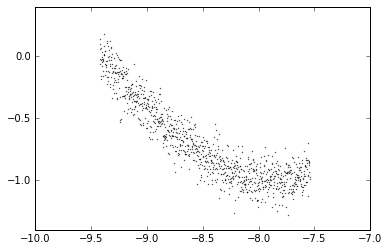

In [60]:
data = test.next_chunk()
X, Y = data[:,0], data[:,1]
plt.scatter(X, Y, s=.1)
plt.show()

In [9]:
X = np.linspace(-3*np.pi, 3*np.pi, 10000)
Y = np.sin(X) + np.hstack((0.1*np.random.randn(3333), 0.2*np.random.randn(3334), 0.1*np.random.randn(3333)))
np.savetxt('data.txt', np.vstack([X, Y]))

In [87]:
test = np.fromfile('testfile.txt', sep=' ')

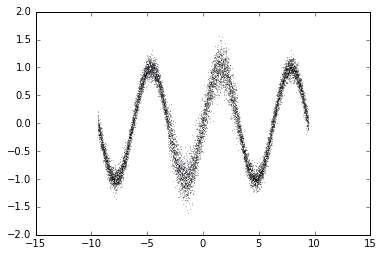

In [89]:
plt.scatter(X,Y, s=.01);plt.show()

In [10]:
for i in range(10):
    write('testfile.txt', str(i**2))